###SME LECTURE-10.11.2025

#DATA PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df = sns.load_dataset('titanic')

df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]

print("Original data head:")
print(df.head())
print("\nOriginal missing values:")
print(df.isnull().sum())

#Handling Missing Values
from sklearn.impute import SimpleImputer

age_imputer = SimpleImputer(strategy='median')
df['age'] = age_imputer.fit_transform(df[['age']])

embarked_imputer = SimpleImputer(strategy='most_frequent')
df['embarked'] = embarked_imputer.fit_transform(df[['embarked']]).ravel()

print("\nData after imputation (no missing values):")
print(df.isnull().sum())

#Encoding Categorical Values
df_encoded = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

print("\nData after encoding:")
print(df_encoded.head())

#Feature Scaling
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']

cols_to_scale = ['pclass', 'age', 'fare']

scaler = StandardScaler()

X_scaled = X.copy()
X_scaled[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

print("\nData after scaling:")
print(X_scaled.head())

#Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nTrain/Test Split Shapes:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Original data head:
   survived  pclass     sex   age     fare embarked
0         0       3    male  22.0   7.2500        S
1         1       1  female  38.0  71.2833        C
2         1       3  female  26.0   7.9250        S
3         1       1  female  35.0  53.1000        S
4         0       3    male  35.0   8.0500        S

Original missing values:
survived      0
pclass        0
sex           0
age         177
fare          0
embarked      2
dtype: int64

Data after imputation (no missing values):
survived    0
pclass      0
sex         0
age         0
fare        0
embarked    0
dtype: int64

Data after encoding:
   survived  pclass   age     fare  sex_male  embarked_Q  embarked_S
0         0       3  22.0   7.2500      True       False        True
1         1       1  38.0  71.2833     False       False       False
2         1       3  26.0   7.9250     False       False        True
3         1       1  35.0  53.1000     False       False        True
4         0       3  35.0

#LINEAR REGRESSION

Sample datset created successfully!
Model slope(coefficient): [126.93481276]
Model intercept: 13029.126213592215

Train R^2: 0.9946125054623525
Test R^2: 0.9708786675736765
Test RMSE: 11415.689318118186


<function matplotlib.pyplot.show(close=None, block=None)>

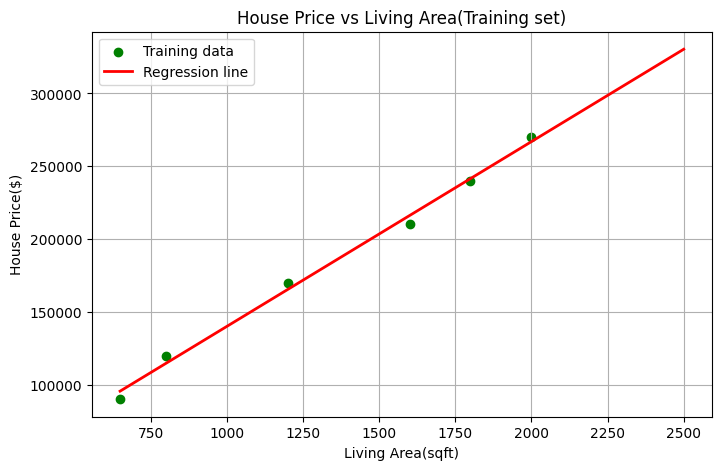

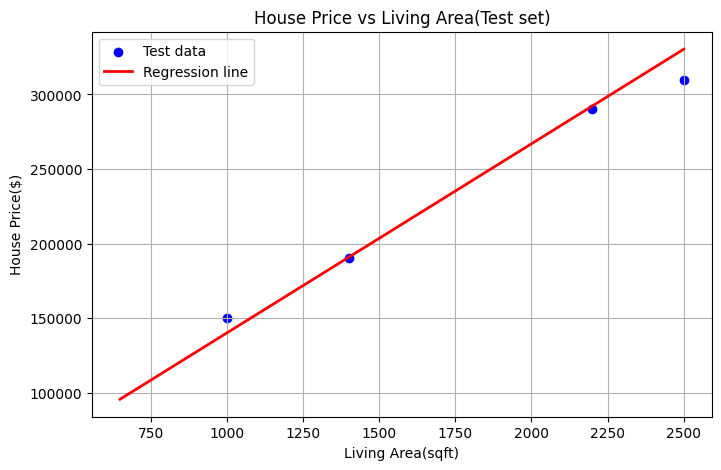

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Create simple dataset manually
data_set={
    'sqft_living':[650,800,1000,1200,1400,1600,1800,2000,2200,2500],
    'price':[90000,120000,150000,170000,190000,210000,240000,270000,290000,310000]
}

#Convert to dataframe
home_data=pd.DataFrame(data_set)

print("Sample datset created successfully!")
home_data.head()

#Creating feature X and Y
X=home_data['sqft_living'].values
Y=home_data['price'].values

#Splitting the dataset into training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=0)

#Fitting the simple linear regression to the training dataset
from sklearn.linear_model import LinearRegression
krizzz=LinearRegression()
krizzz.fit(X_train.reshape(-1,1),Y_train)

#Prediction of test and training
Y_test_pred=krizzz.predict(X_test.reshape(-1, 1))
Y_train_pred=krizzz.predict(X_train.reshape(-1, 1))

#Print model parameters and simple metrics
print("Model slope(coefficient):",krizzz.coef_)
print("Model intercept:",krizzz.intercept_)

#Printing evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
print("\nTrain R^2:",r2_score(Y_train,Y_train_pred))
print("Test R^2:",r2_score(Y_test,Y_test_pred))
print("Test RMSE:",np.sqrt(mean_squared_error(Y_test,Y_test_pred)))

#Visualize the training results with a smooth regression line
plt.figure(figsize=(8,5))
plt.scatter(X_train,Y_train,label='Training data',color='green')
#Create Smooth line for regression
line_x=np.linspace(X.min(),X.max(),100).reshape(-1,1)
line_y=krizzz.predict(line_x)
plt.plot(line_x,line_y,color='red',linewidth=2,label='Regression line')

plt.title('House Price vs Living Area(Training set)')
plt.xlabel('Living Area(sqft)')
plt.ylabel('House Price($)')
plt.legend()
plt.grid(True)

#Visualize the test results(with same regression line)
plt.figure(figsize=(8,5))
plt.scatter(X_test,Y_test,label='Test data',color='blue')
plt.plot(line_x,line_y,color='red',linewidth=2,label='Regression line')
plt.title('House Price vs Living Area(Test set)')
plt.xlabel('Living Area(sqft)')
plt.ylabel('House Price($)')
plt.legend()
plt.grid(True)
plt.show

#LOGISTIC REGRESSION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
         survived      pclass         age       sibsp       parch        f

/tmp/ipython-input-1822352207.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)



Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.81      0.71      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

Confusion Matrix:
 [[139  18]
 [ 32  79]]


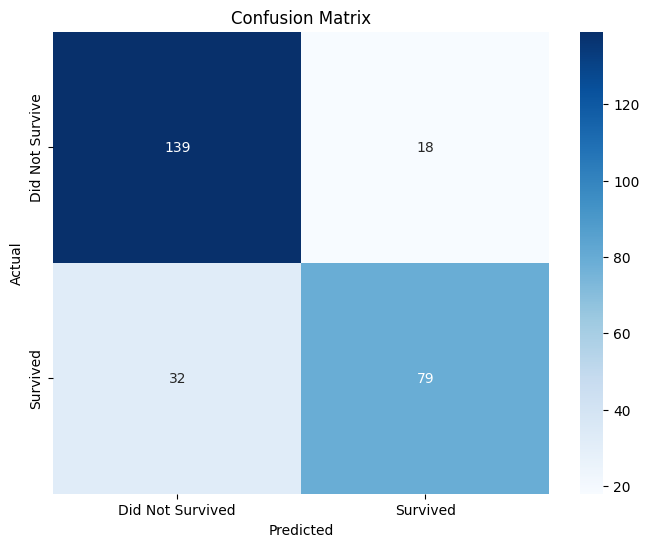

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,auc

#Load Titanic dataset
data = sns.load_dataset('titanic')
data.head()

#Display dataset info and statistics
print(data.info())
print(data.describe())

#Select Features
features=['pclass','sex','age','sibsp','parch','fare']
data=data[features + ['survived']]
data

#Handling missing values
data['age'].fillna(data['age'].median(), inplace=True)

#convert categorical column 'sex' to numerical
le= LabelEncoder()
data['sex']=le.fit_transform(data['sex'])

#Split features and target
x=data[features]
y=data['survived']

#Train-Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#Train logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=200)
model.fit(x_train,y_train)

#Prediction
y_pred=model.predict(x_test)

#Evaluation
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

#Confusion Matrix and Graph
cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Did Not Survived','Survived'],yticklabels=['Did Not Survive','Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###SME LECTURE - 11.11.2025

#DECISION TREE



Student Performance Dataset:
   Study_Hours  Attendance(%)  Internal_Marks Result
0            1             55              35   Fail
1            2             60              45   Fail
2            3             65              50   Fail
3            4             70              55   Fail
4            5             75              60   Pass
5            6             80              70   Pass
6            7             85              75   Pass
7            8             90              80   Pass
8            9             95              85   Pass
9           10             98              90   Pass

Accuracy: 1.0

Confusion Matrix:
 [[1 0]
 [0 2]]


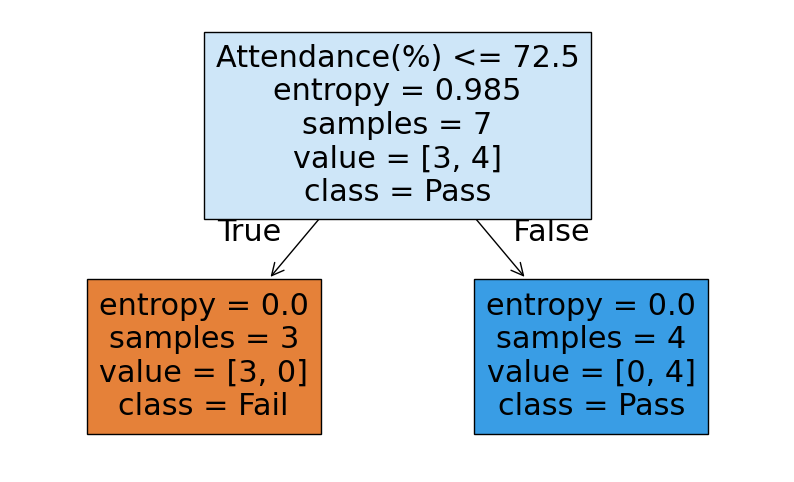

In [ ]:
#Importing pandas library
import pandas as pd

#Create your own dataset
data={
    'Study_Hours':[1,2,3,4,5,6,7,8,9,10],
    'Attendance(%)':[55,60,65,70,75,80,85,90,95,98],
    'Internal_Marks':[35,45,50,55,60,70,75,80,85,90],
    'Result':['Fail','Fail','Fail','Fail','Pass','Pass','Pass','Pass','Pass','Pass']
}

#Convert to dataframe
df=pd.DataFrame(data)
df.head()

#Show Dataset
print('Student Performance Dataset:')
print(df)

#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

#Prepare data
x=df[['Study_Hours','Attendance(%)','Internal_Marks']]
y=df['Result']

#Split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#Train Model
model=DecisionTreeClassifier(criterion='entropy',random_state=0)
model.fit(x_train,y_train)

#Predict
y_pred=model.predict(x_test)

#Evaluate
print('\nAccuracy:',accuracy_score(y_test,y_pred))
print('\nConfusion Matrix:\n',confusion_matrix(y_test,y_pred))

#Visualize
plt.figure(figsize=(10,6))
plot_tree(model,feature_names=x.columns,class_names=['Fail','Pass'],filled=True)
plt.show()


#RANDOM FOREST

In [ ]:
#Importing necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Load famous iris dataset
iris=load_iris()

dff=pd.DataFrame(data=iris.data,columns=iris.feature_names)
dff

#Create dataframe for better visualization
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['species']=iris.target

#Display first 5 rows
print("Sample of Dataset:")
print(df.head())

#Split data into features(X) and labels(Y)
x=df.iloc[:,:-1] #All colums except the last one
y=df.iloc[:,-1] #Only the species column

#Split data into training and testing sets(80% train and 20% test)
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

#Create Random Forest classifier model
rf=RandomForestClassifier(n_estimators=100,random_state=42)

#Train the model
rf.fit(x_train,y_train)

#Predict using the test data
y_pred=rf.predict(x_test)

#Evaluate model performance
print('\nConfusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('\nClassification Report:')
print(classification_report(y_test,y_pred))
print('\nAccuracy of Random Forest model:')
print(accuracy_score(y_test,y_pred))


Sample of Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.0

#KNN

In [ ]:
#Import libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Load iris dataset
iris=load_iris()

#Convert datset to DataFrame
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['species']=iris.target

#Display first 5 rows
print("Sample of Dataset:")
print(df.head())

#Split data into features(X) and targets(Y)
x=df.iloc[:,:-1] #All colums except the last one
y=df.iloc[:,-1] #Only the species column

#Split data into training and testing sets(80% train and 20% test)
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

#Feature Scaling(important for KNN)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

#Create and train KNN classifier
knn=KNeighborsClassifier(n_neighbors=5)  #Using K=5
knn.fit(x_train,y_train)

#Make predictions
y_pred=knn.predict(x_test)

#Evaluate Model Performance
print('\nConfusion Matrix:')
print(confusion_matrix(y_test,y_pred))

print('\nClassification Report:')
print(classification_report(y_test,y_pred))

print('\nAccuracy of KNN model:')
print(accuracy_score(y_test,y_pred))

Sample of Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.0

#BAGGING

In [ ]:
#Import Libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Load dataset
iris=load_iris()
x,y=iris.data,iris.target

#Split into train/test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#Create Base Model
base_model=DecisionTreeClassifier()

#Create bagging model
bag_model=BaggingClassifier(estimator=base_model,n_estimators=100,random_state=42)

#Train both models
base_model.fit(x_train,y_train)
bag_model.fit(x_train,y_train)

#Compare performance
y_pred_base=base_model.predict(x_test)
y_pred_bag=bag_model.predict(x_test)

print('Accuracy of Single Decision Tree:',accuracy_score(y_test,y_pred_base))
print('Accuracy after Bagging:',accuracy_score(y_test,y_pred_bag))

Accuracy of Single Decision Tree: 1.0
Accuracy after Bagging: 1.0


#STACKING

In [ ]:
#Importing libraries
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Define base learners
base_learners=[
    ('svm',SVC(probability=True)),
    ('knn',KNeighborsClassifier(n_neighbors=5))
]

#Meta Learner(final model)
meta_model=LogisticRegression()

#Create Stacking Model
stack_model=StackingClassifier(estimators=base_learners,final_estimator=meta_model)

#Train
stack_model.fit(x_train,y_train)

#Evaluate
y_pred_stack=stack_model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred_stack))

#BOOSTING

##AdaBoost

In [ ]:
#Import AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

#Create base model
base_model=DecisionTreeClassifier(max_depth=1)

#Create boosting model
boost_model=AdaBoostClassifier(estimator=base_model,n_estimators=50,learning_rate=1.0,random_state=42)

#Load dataset
iris=load_iris()
x,y=iris.data,iris.target

#Train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
boost_model.fit(x_train,y_train)

#Evaluate
y_pred_boost=boost_model.predict(x_test)
print('Accuracy with AdaBoost:',accuracy_score(y_test,y_pred_boost))

##Gradient Boosting

In [ ]:
#Import Libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Load dataset
iris=load_iris()
x,y=iris.data,iris.target

#Split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#Create Gradient Boosting model
gb_model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)

#Train the model
gb_model.fit(x_train,y_train)

#Make Predictions
y_pred_gb=gb_model.predict(x_test)

#Evaluate performance
print('\nConfusion Matrix from Gradient Boosting:')
print(confusion_matrix(y_test,y_pred_gb))

print('\nClassification Report from Gradient Boosting:')
print(classification_report(y_test,y_pred_gb))

print('Accuracy of Gradient Boosting Model:')
print(accuracy_score(y_test,y_pred_gb))


Confusion Matrix from Gradient Boosting:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report from Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy of Gradient Boosting Model:
1.0


##XGBoost

In [ ]:
#Import libraries
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Load Datasets
iris=load_iris()
x,y=iris.data,iris.target

#Split Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#Create XGBoost model
xgb_model=xgb.XGBClassifier(
    n_estimators=100,  #number of trees
    learning_rate=0.1,  #step size shrinkage
    max_depth=3,  #maximum depth of tree
    subsample=0.8,  #fraction of training samples to use
    colsample_bytree=0.8,  #fraction of features per tree
    random_state=42,
    eval_metric='mlogloss'  #multiclass log loss metric
)

#Train
xgb_model.fit(x_train,y_train)

#Make Predictions
y_pred_xgb=xgb_model.predict(x_test)

#Evaluate Performance
print('\nConfusion Matrix from XGBoost:')
print(confusion_matrix(y_test,y_pred_xgb))

print('\nClassification Report from XGBoost:')
print(classification_report(y_test,y_pred_xgb))

print('Accuracy of XGBoost Model:')
print(accuracy_score(y_test,y_pred_xgb))


Confusion Matrix from XGBoost:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report from XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy of XGBoost Model:
1.0


#SVM

Accuracy: 0.8


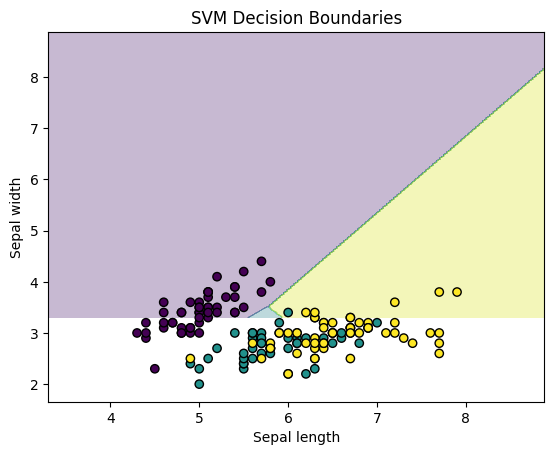

In [ ]:
#Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

#Load dataset
iris=load_iris()
x,y=iris.data[:, :2],iris.target

#Split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#Train SVM Model
svm_model=SVC(kernel='linear')
svm_model.fit(x_train,y_train)

#Predict and check accuracy
y_pred=svm_model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred))

#Visualize decision boundaries
x_min,x_max=x[:,0].min()-1,x[:,0].max()+1
y_min,y_max=x[:,0].min()-1,x[:,0].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
z=svm_model.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)

#Plot Graph
plt.contourf(xx,yy,z,alpha=0.3)
plt.scatter(x[:,0],x[:,1],c=y,edgecolors='k',marker='o')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundaries')
plt.show()

##SME LECTURE-12.11.2025

#DEEP LEARNING

1. Artificial Neural Network(ANN) mimic the human brain through
interconnected neurons.\

2.
*   Layers:Input ,Output and Hidden.\
*   Each neuron computes weighted inputs and applies an activation function.\
*   Learning occurs through Backpropagation and Weight Adjustment.\

3. Formula:y=f(w1x1+w2x2+....+b)


A single-layer ANN has only an input and an output layer, making it suitable for simple, linearly separable problems.\
A multi-layer ANN includes one or more "hidden" layers between the input and output, which allows it to learn complex, non-linear relationships and solve a wider range of problems

ReLU and Leaky ReLU are both activation functions in neural networks, with ReLU being simpler.\
The core difference is that ReLU outputs zero for all negative inputs (\(f(x)=max(0,x)\)), whereas Leaky ReLU passes a small, linear fraction of the input through (\(f(x)=max(0.01x,x)\)).

An activation function is a component in a neural network that decides whether a neuron should be activated or not.\
The sigmoid function is a specific type of activation function that maps any input value to an output between 0 and 1, with an S-shaped curve

Bias in deep learning refers to systematic errors or prejudices in a model's outputs, which often stem from biased training data.

#TensorFlow and Keras Framework

TensorFlow is an open source framework for building and training deep and learning models.\
Keras is a high level API on TensorFlow simplifying neural network creation.

* TensorFlow: low-level, flexible, powerful.
* Keras: high-level, user friendly.
* Both support large-scale model training and deployment.

##CODE:

In [ ]:
#Import Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

#Create Simple Training Data
#Features:([Study Hours, Sleep Hours])
x=np.array([
    [2,9],
    [1,5],
    [3,6],
    [4,8],
    [6,9],
    [5,5],
    [7,3]
],)

#Labels: 1=Pass,0=Fail
y=np.array([
    [0],
    [0],
    [1],
    [1],
    [1],
    [1],
    [1]
], dtype=float)

#Normalize data
x=x/np.amax(x,axis=0)  #Scale all values between 1 and 0

#Build the Neural Network Model
model=keras.Sequential([
    layers.Dense(4,input_dim=2,activation='relu'), #Hidden layer with 4 neurons
    layers.Dense(1,activation='sigmoid'), #Output layer(binary output)

])

#Compile the Model
model.compile(optimizer='adam', #Optimiztion algorithm
              loss='binary_crossentropy', #Suitable for binary classification
              metrics=['accuracy'] #To measur performance
              )

#Train the model
model.fit(x,y,epochs=200,verbose=0) #Train for 200 epochs quitely

#Test the model with a new input
test_data=np.array([[4,7]])  /np.amax(x,axis=0) #normalize test input
prediction=model.predict(test_data)

print("Predicted Output (1=Pass, 0=Fail):",prediction)
if prediction >=0.5:
  print("The student is likely to PASS")
else:
  print("The student is likely to FAIL")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted Output (1=Pass, 0=Fail): [[0.54699636]]
The student is likely to PASS


#PCA

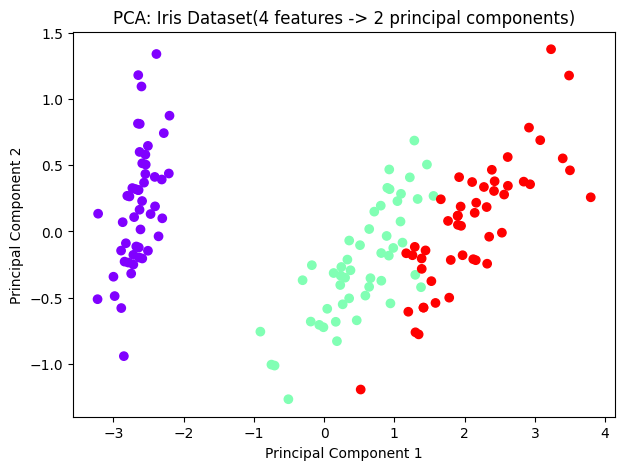

In [ ]:
#Import libraries
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

#Load dataset
iris=load_iris()
x=iris.data
y=iris.target

#Apply PCA(reduce 4D->2D)
pca=PCA(n_components=2)
X_pca=pca.fit_transform(x)

#Visualize the result
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='rainbow')
plt.title("PCA: Iris Dataset(4 features -> 2 principal components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#K-MEANS CLUSTERING

K-Means is an unsupervised algorithm grouping data into K clusters.\
* Minimizes within cluster variable(WCSS).
* Requires specifying K(number of clusters).
* Works best on well-seperated , spherical clusters.

###Importance Of Dimensionality Reduction
Dimensionality Reduction improves efficiency and model performance.\
* Avoids curse of dimensionality
* Reduces overfitting and noise.
* Speeds up computation.
* Improves visualization and interpretability.

##CODE:

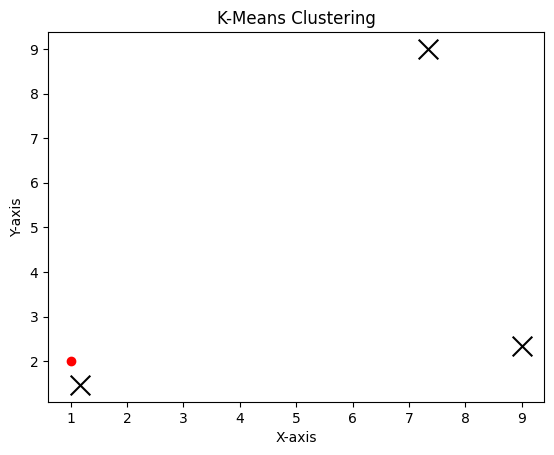

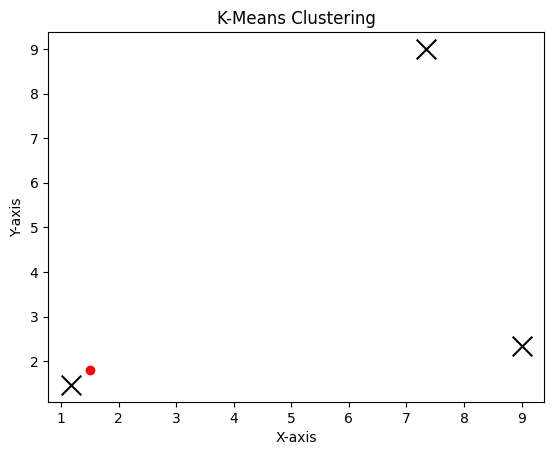

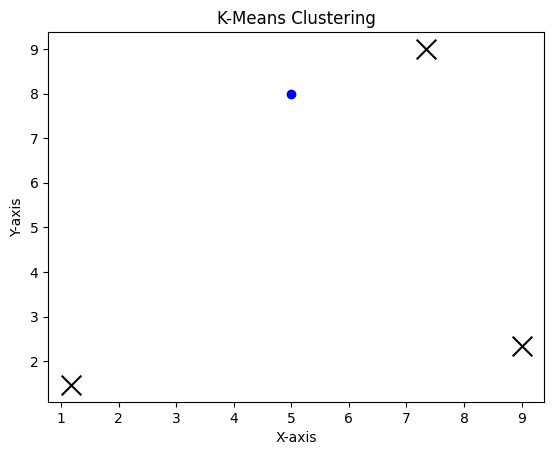

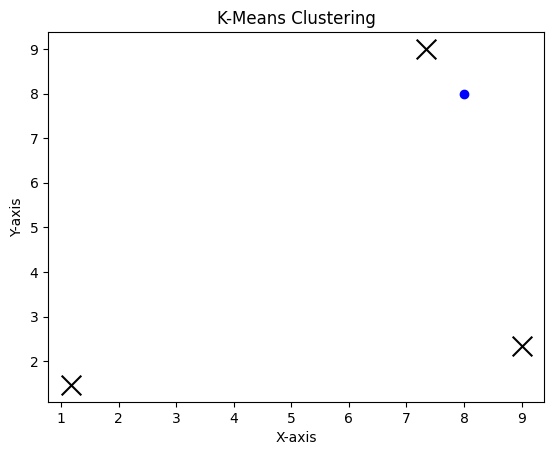

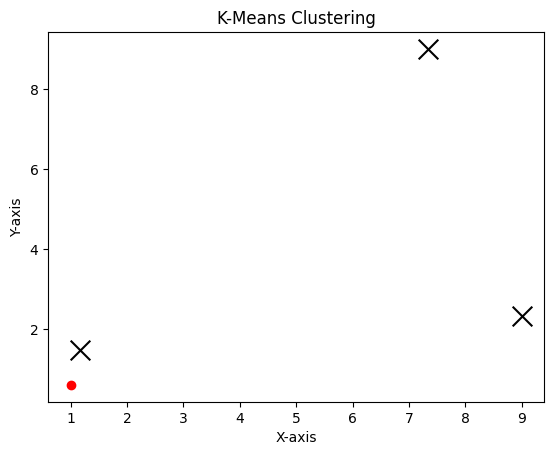

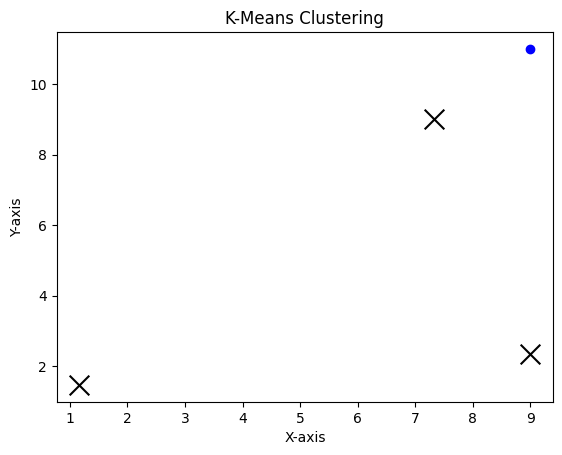

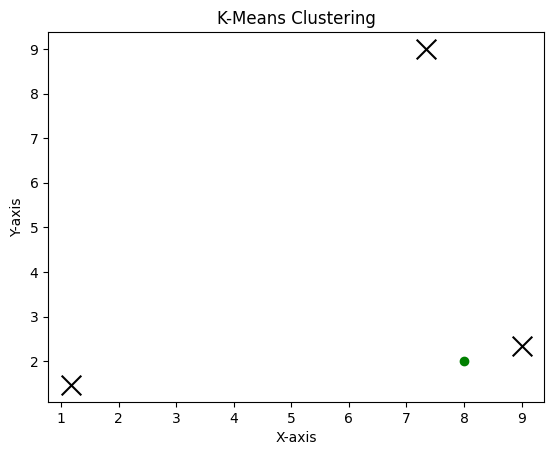

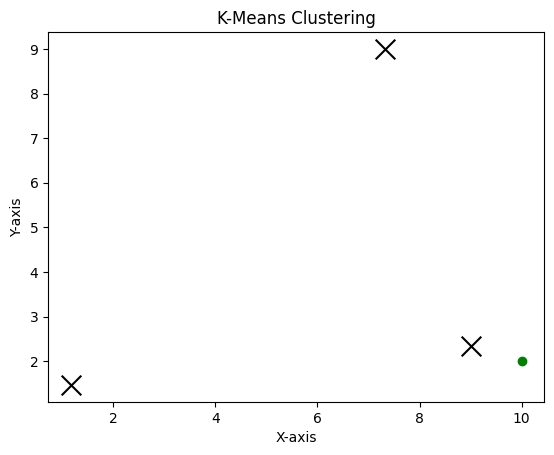

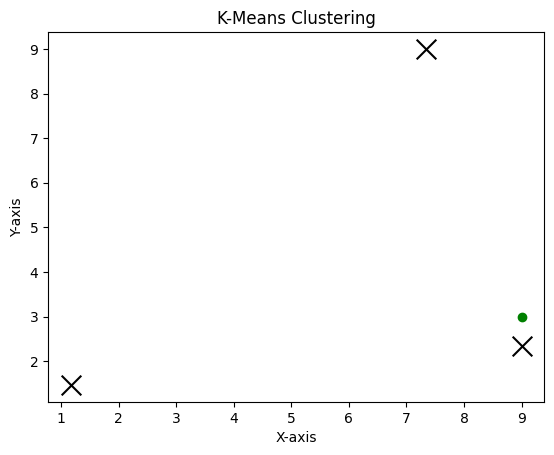

In [ ]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Create some sample data
X=np.array([
    [1,2],[1.5,1.8],[5,8],
    [8,8],[1,0.6],[9,11],
    [8,2],[10,2],[9,3]
])

#Build K-Means model
kmeans=KMeans(n_clusters=3,random_state=0)

#Fit the model
kmeans.fit(X)

#Get cluster centers and labels
centroids=kmeans.cluster_centers_
labels=kmeans.labels_

#Visualize the clusters
colors=["red","green","blue"]

for i in range(len(X)):
  plt.scatter(X[i][0], X[i][1],color=colors[labels[i]])

  plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=200, color='black')
  plt.title("K-Means Clustering")
  plt.xlabel("X-axis")
  plt.ylabel("Y-axis")
  plt.show()

#HIERARCHICAL CLUSTERING

Hierarchical Clustering builds a dendrogram to show nested clusters.

* Agglomerative: Bottom-up merging.
* Divisive: Top-down splitting.
* Linkage methods: Single, Complete, Average, Ward's

##CODE:

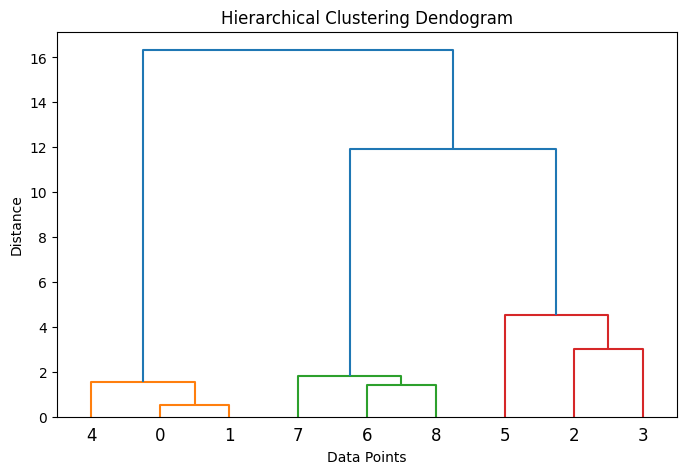

Cluster labels: [1 1 3 3 1 3 2 2 2]


In [ ]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering

#Create sample data
X=np.array([
    [1,2],[1.5,1.8],[5,8],
    [8,8],[1,0.6],[9,11],
    [8,2],[10,2],[9,3]
])

#Perform hierarchical clustering
Z=linkage(X,method='ward')  #'ward' minimizes variance

#Plot the dendogram
plt.figure(figsize=(8,5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

#Form clusters
clusters=fcluster(Z,t=3,criterion='maxclust')

print("Cluster labels:",clusters)